## Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

## Read and understand the training dataset

In [2]:
traindf = pd.read_csv(r'train.csv')
null_values = traindf.isnull().sum()
print('Check for null Values :\n', null_values)
print('Check basic statistics: \n', traindf.describe(include='all'))
print('Check number of unique entries: \n', traindf.nunique())
print('Check for Data Types: \n', traindf.dtypes)

Check for null Values :
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Check basic statistics: 
         PassengerId    Survived      Pclass                             Name  \
count    891.000000  891.000000  891.000000                              891   
unique          NaN         NaN         NaN                              891   
top             NaN         NaN         NaN  Pengelly, Mr. Frederick William   
freq            NaN         NaN         NaN                                1   
mean     446.000000    0.383838    2.308642                              NaN   
std      257.353842    0.486592    0.836071                              NaN   
min        1.000000    0.000000    1.000000                              NaN   
25%      223.500000    0.000000    2.000000                         

## Data Cleaning
- Dropping unnecessary columns
- Dropping rows with missing values
- Assigning integers to categorical variables

In [3]:
traindf = traindf.drop(['Cabin', 'Name', 'PassengerId', 'Ticket', 'SibSp', 'Parch', 'Age'], axis=1)
traindf = traindf.dropna(axis=0, subset=['Embarked'])
traindf.Sex = traindf.Sex.map({'male': 0, 'female': 1})
traindf.Embarked = traindf.Embarked.map({'S': 0, 'C': 1, 'Q': 2})
traindf

,Survived,Pclass,Sex,Fare,Embarked
0,0,3,0,7.2500,0
1,1,1,1,71.2833,1
2,1,3,1,7.9250,0
3,1,1,1,53.1000,0
4,0,3,0,8.0500,0
...,...,...,...,...,...
886,0,2,0,13.0000,0
887,1,1,1,30.0000,0
888,0,3,1,23.4500,0
889,1,1,0,30.0000,1


## Create a correlation matrix to check dependencies

In [4]:
correlation_matrix = traindf.corr()
correlation_matrix['Survived'].sort_values(ascending=False)

Survived    1.000000
Sex         0.541585
Fare        0.255290
Embarked    0.108669
Pclass     -0.335549
Name: Survived, dtype: float64

## Create a Decision Tree model

In [6]:
featuresdf = traindf[list(traindf.columns[1:])]
targetdf = traindf['Survived']
clf1 = tree.DecisionTreeClassifier()
model1 = clf1.fit(featuresdf, targetdf)

## Create a Random Forest Classifier
#### number of estimators are assigned arbitrarily

In [19]:
clf2 = RandomForestClassifier(n_estimators=100)
model2 = clf2.fit(featuresdf, targetdf)

## Get the testing dataset and clean it

In [8]:
titanictestdf = pd.read_csv(r'test.csv')
testdf = titanictestdf.drop(['Cabin', 'Name', 'PassengerId', 'Ticket','SibSp', 'Parch', 'Age'], axis=1)
testdf = testdf.dropna(axis=0, subset=['Embarked'])
testdf.Sex = testdf.Sex.map({'male': 0, 'female': 1})
testdf.Embarked = testdf.Embarked.map({'S': 0, 'C': 1, 'Q': 2})
testdf

,Pclass,Sex,Fare,Embarked
0,3,0,7.8292,2
1,3,1,7.0000,0
2,2,0,9.6875,2
3,3,0,8.6625,0
4,3,1,12.2875,0
...,...,...,...,...
413,3,0,8.0500,0
414,1,1,108.9000,1
415,3,0,7.2500,0
416,3,0,8.0500,0


## Check for missing values

In [9]:
testdf.isnull().sum()

Pclass      0
Sex         0
Fare        1
Embarked    0
dtype: int64

## Get the details for missing value

In [10]:
testdf.loc[testdf[testdf['Fare'].isnull()].index.to_list()]

,Pclass,Sex,Fare,Embarked
152,3,0,NaN,0


## Get all the information on index 152

In [11]:
titanictestdf.loc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

## We will check if we can predict the missing value by using Pclass

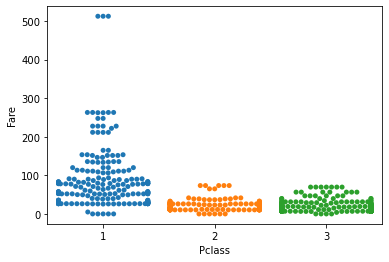

In [12]:
sns.swarmplot(traindf.Pclass, traindf.Fare)


## Get the average of fares in each ticket class (in both training and testing datasets)

In [13]:
traindf.groupby('Pclass')['Fare'].agg(np.mean)

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [14]:
testdf.dropna().groupby('Pclass')['Fare'].agg(np.mean)

Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64

## Assign the average of these two results of 3rd class ticket averages to the missing value

In [15]:
testdf.loc[152, 'Fare'] = np.mean([testdf.dropna().groupby('Pclass')['Fare'].agg(np.mean).loc[3],traindf.dropna().groupby('Pclass')['Fare'].agg(np.mean).loc[3]])
testdf.loc[152,'Fare'] 

13.067613991008665

## Predict the survival using created model

### Model 1: Decision Tree

In [21]:
model1.predict(testdf)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

### Model 3: Random Forest Classifier

In [20]:
model2.predict(testdf)

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [23]:
(model1.predict(testdf) != model2.predict(testdf)).sum()

6

## Add the prediction in the Survived column against passenger Id in a new dataframe

In [24]:
survival_prediction = titanictestdf.copy()
survival_prediction['Survived'] = model2.predict(testdf)
survival_prediction = survival_prediction[['PassengerId', 'Survived']].set_index('PassengerId')
survival_prediction

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


## Save the result

In [25]:
survival_prediction.to_csv('survival_prediction100est.csv')

***Model 1 turns out to be 77.99% accurate***

***Model 2 turns out to be 78.94% accurate***